In [67]:
import numpy as np

X, Y = np.loadtxt("temp.txt", skiprows=1, unpack=True)



In [68]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

In [69]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 58., 15., 15.,
       45., 47., 13., 63., 16., 21., 37., 30., 26., 56., 23., 39., 27.,
       45., 17., 18., 23.])

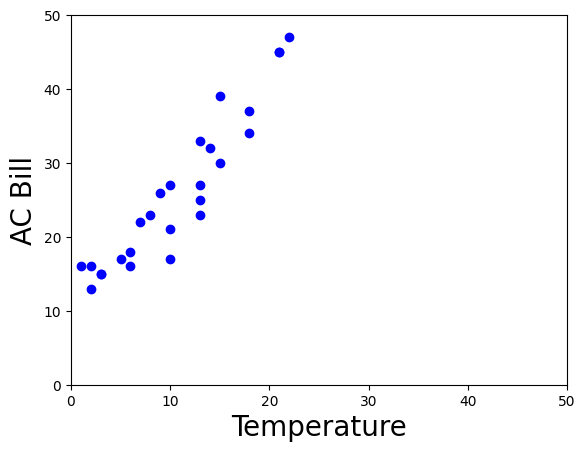

In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.xlabel("Temperature", fontsize=20)  
plt.ylabel("AC Bill", fontsize=20)        
plt.axis([0, 50, 0, 50])                 
plt.plot(X, Y, "bo")                    
plt.show()    

In [71]:
def predict(X, w, b):
    return X * w + b

In [72]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

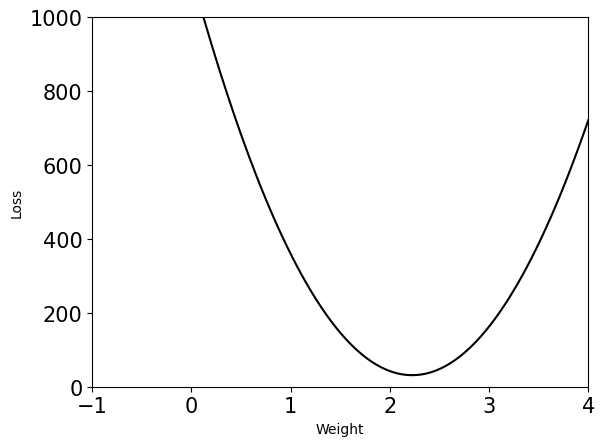

In [73]:
import matplotlib.pyplot as plt

%matplotlib inline

weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.plot(weights, losses, color="black")

plt.show()

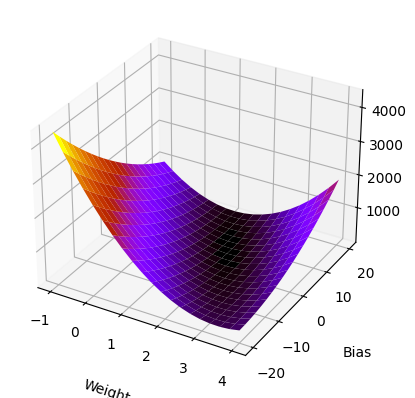

In [74]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

MESH_SIZE = 20
weights = np.linspace(-1, 4, MESH_SIZE)
biases = np.linspace(-20, 20, MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlabel("Weight", labelpad=15)
ax.set_ylabel("Bias", labelpad=15)
ax.set_zlabel("Loss", labelpad=15)
ax.plot_surface(W, B, L, cmap=cm.gnuplot, antialiased=True)

plt.show()

We want to implement gradient descent–and algorithm that descends the gradient of this curve. First, let's write a function to calculate the gradient. In mathematical formula, the loss looks like this:

\begin{align*}
L = \frac{1}{m}\sum\limits_{i} ((wx_i + b) - y_i) ^ 2
\end{align*}

The gradient of this loss is the composition of the derivatives of `L` with respect to `w` and `b`. If you know calculus, then you can calculate those derivatives on your own. If you don't, then here they are:

\begin{align*}
\frac{\partial L}{\partial w} = \frac{2}{m}\sum\limits_{i} x((wx_i + b) - y_i)
\end{align*}

\begin{align*}
\frac{\partial L}{\partial b} = \frac{2}{m}\sum\limits_{i} ((wx_i + b) - y_i)
\end{align*}


In [75]:
def gradient(X, Y, w, b):
    w_gradient = np.average(2 * X * (predict(X, w, b) - Y))
    b_gradient = np.average(2 * (predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

In [76]:
gradient(X, Y, 2, 3)

(-22.266666666666666, -3.8)

In [77]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        # print("Iteration %4d => Loss: %.6f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

In [78]:
w, b = train(X, Y, 10000, 0.001)

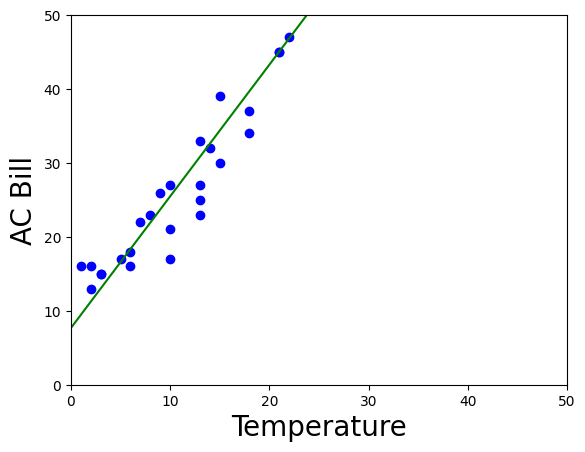

In [79]:
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("AC Bill", fontsize=20)
plt.axis([0, 50, 0, 50])
plt.plot(X, Y, "bo")


plt.plot([0, 50], [b, predict(50, w, b)], color="g")


plt.show()

In [80]:
w       

1.7805243401160904

In [81]:
b

7.670145815852669

In [84]:
print(f"{predict(50, w, b):.2f}")

96.70
